In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1721,2020-09-22,United Kingdom,397604.0,398625.0,41830.0,41788.0,-1021.0,42.0
1722,2020-09-22,Germany,273609.0,274158.0,9393.0,9396.0,-549.0,-3.0
1723,2020-09-22,Iran,425291.0,425481.0,24507.0,24478.0,-190.0,29.0
1724,2020-09-22,Turkey,304102.0,304610.0,7561.0,7574.0,-508.0,-13.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10657.286790266513
RMSE =  39112.360792297026


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  315.6865585168019
RMSE =  789.5051719717258


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  77524.1226993865
RMSE =  123458.1917747643
-- World performances for deaths --
MAE =  1862.239263803681
RMSE =  2270.1749952817413


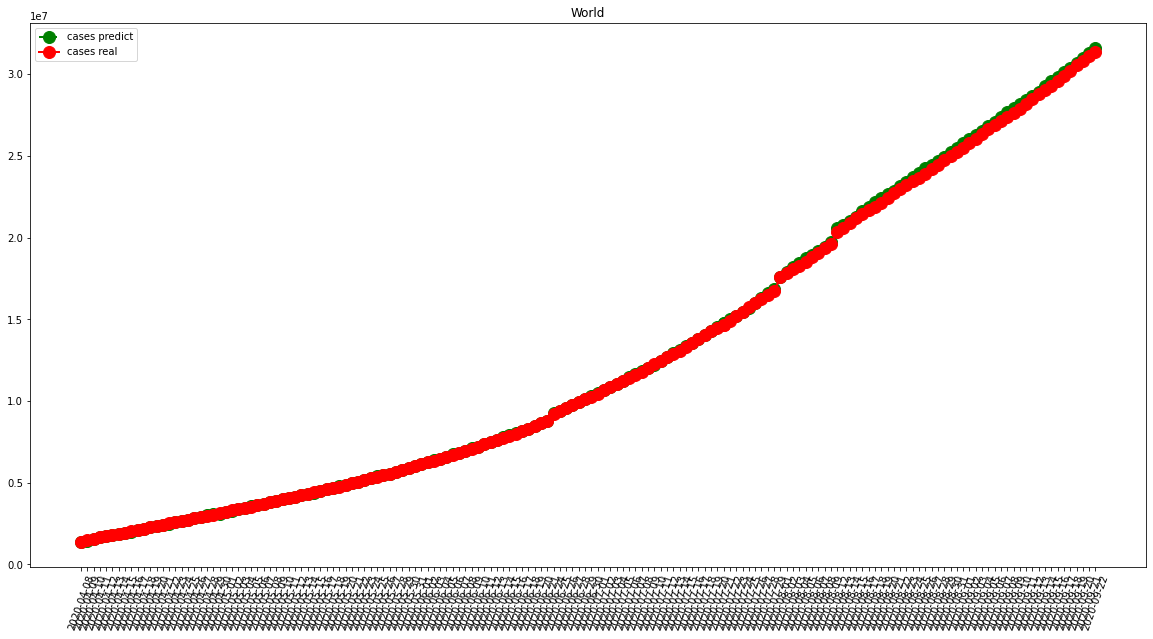

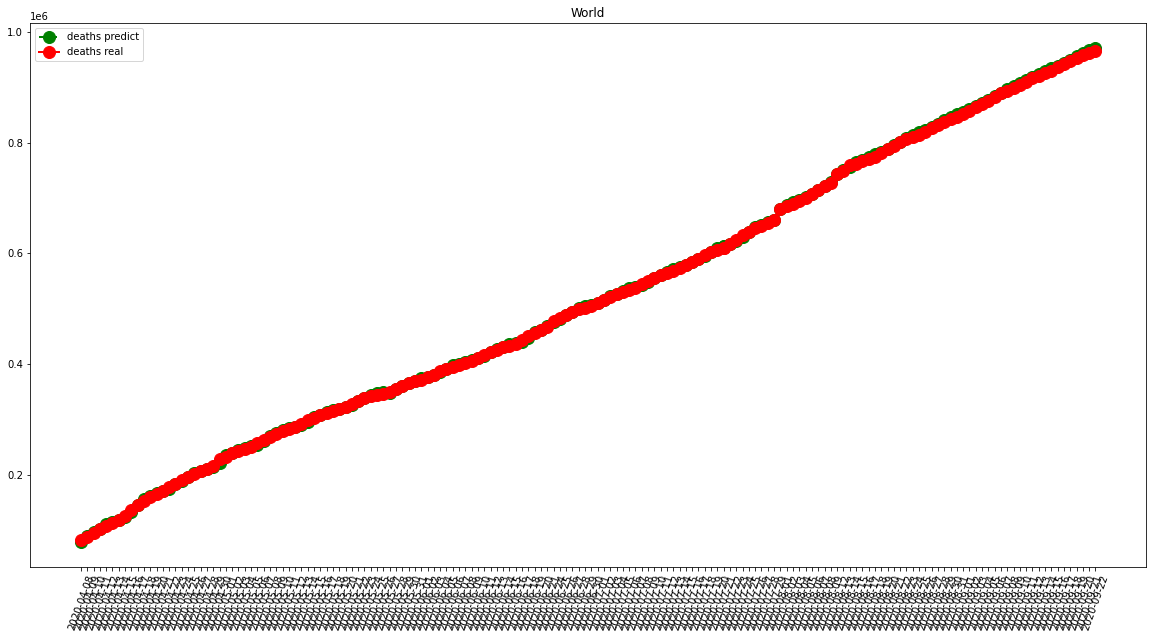

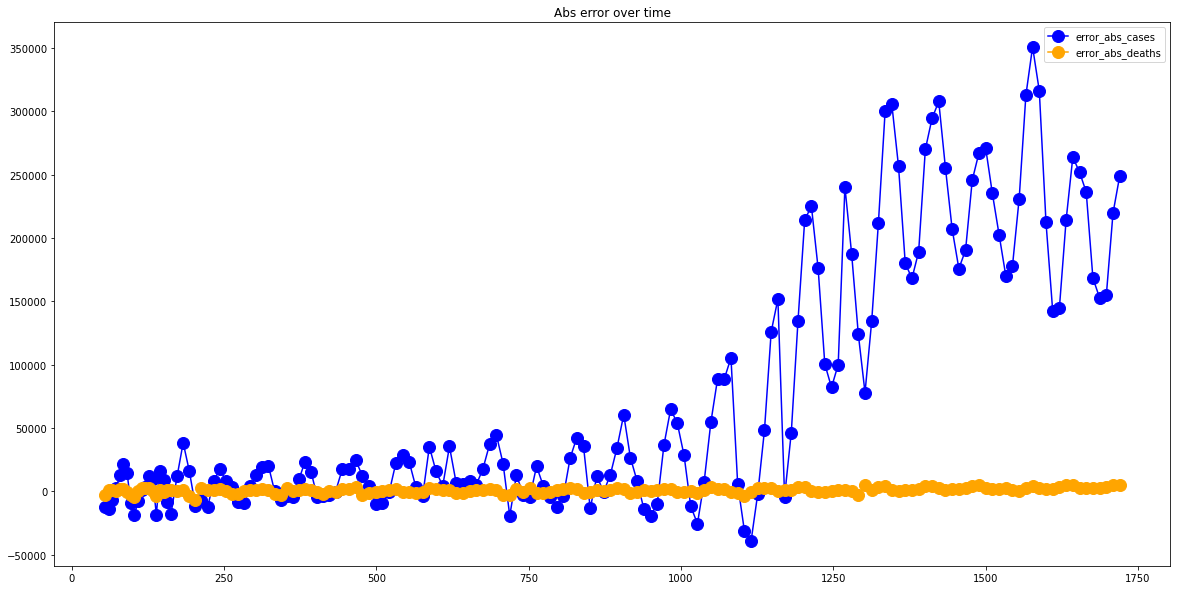

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1195.2890173410406
RMSE =  1798.783154843932
-- France performances for deaths --
MAE =  111.4393063583815
RMSE =  255.4710146109699


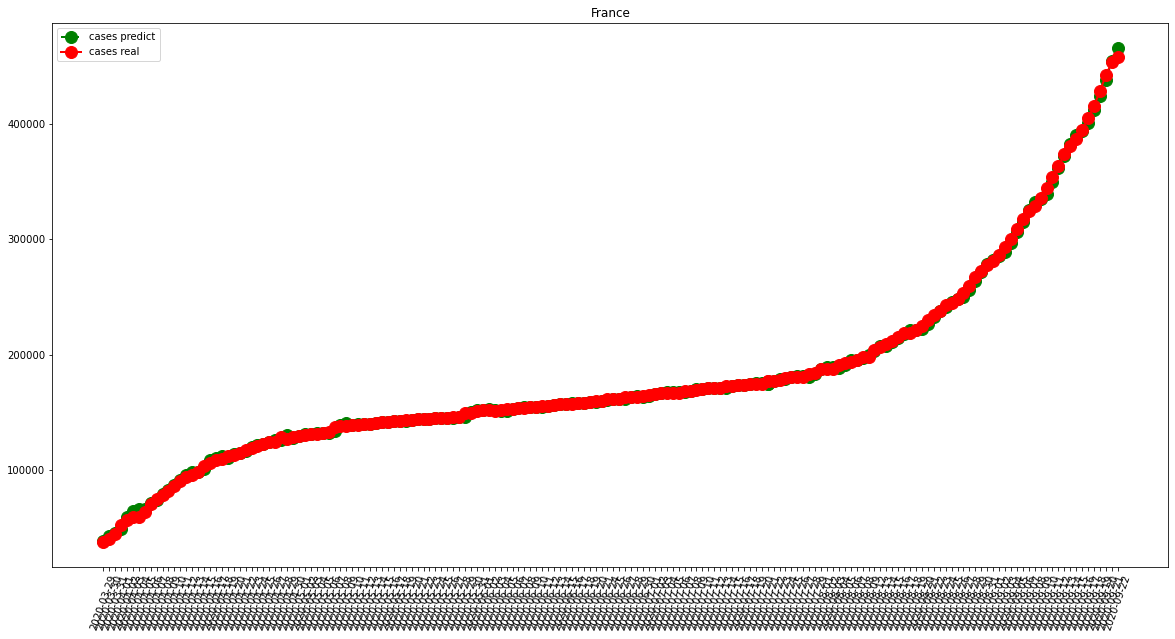

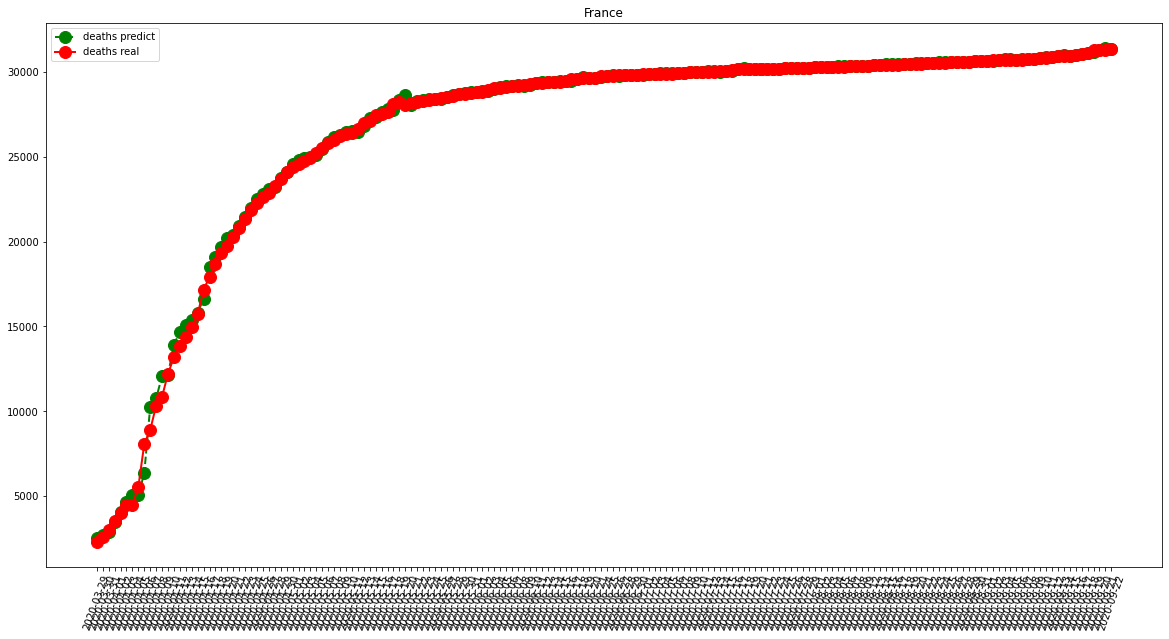

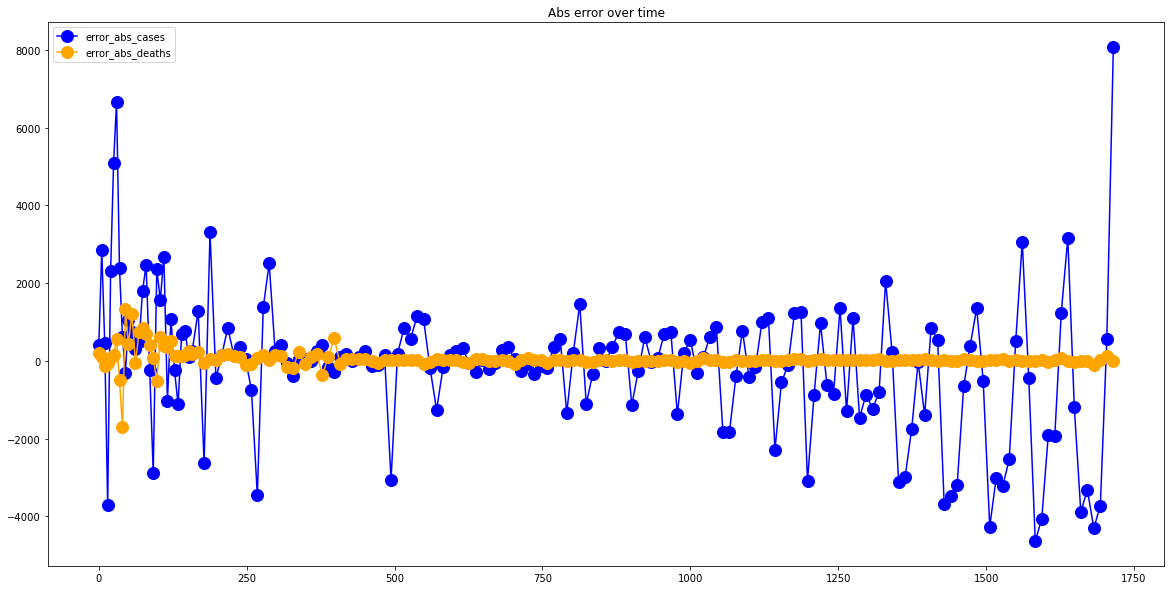

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.7630057803468
RMSE =  445.86419949695846
-- Italy performances for deaths --
MAE =  66.42196531791907
RMSE =  225.7705751446722


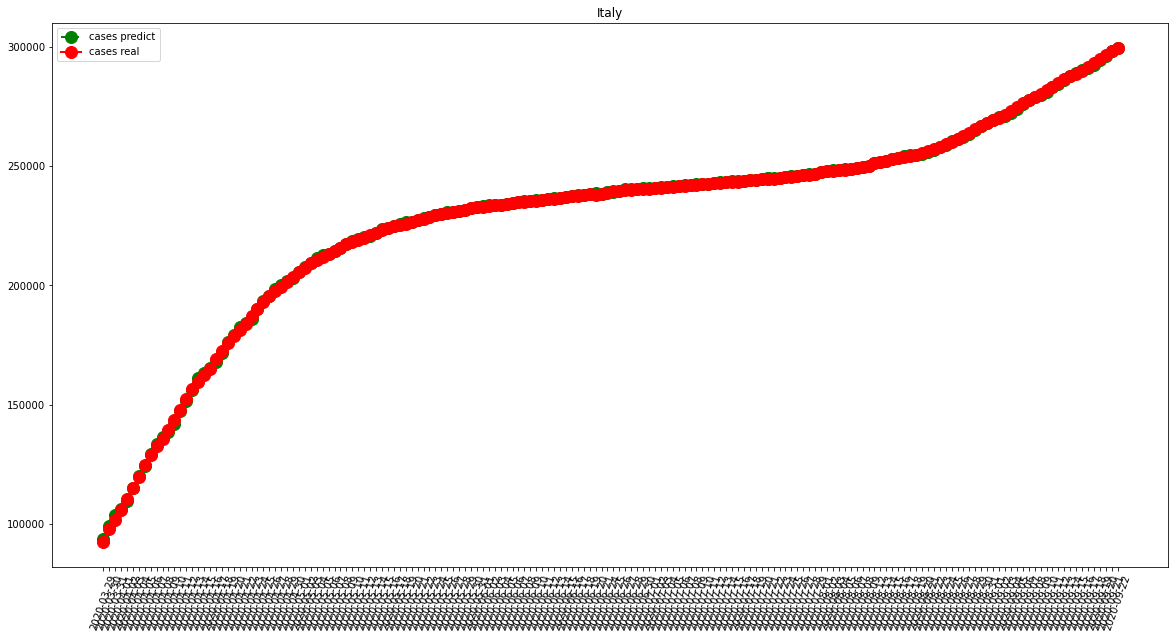

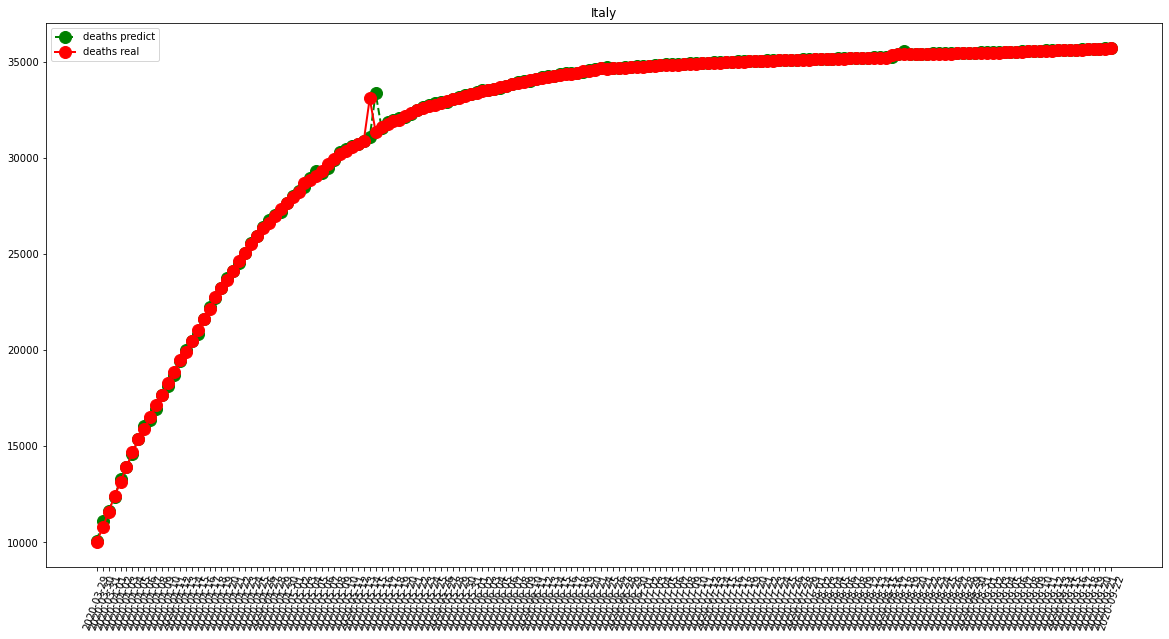

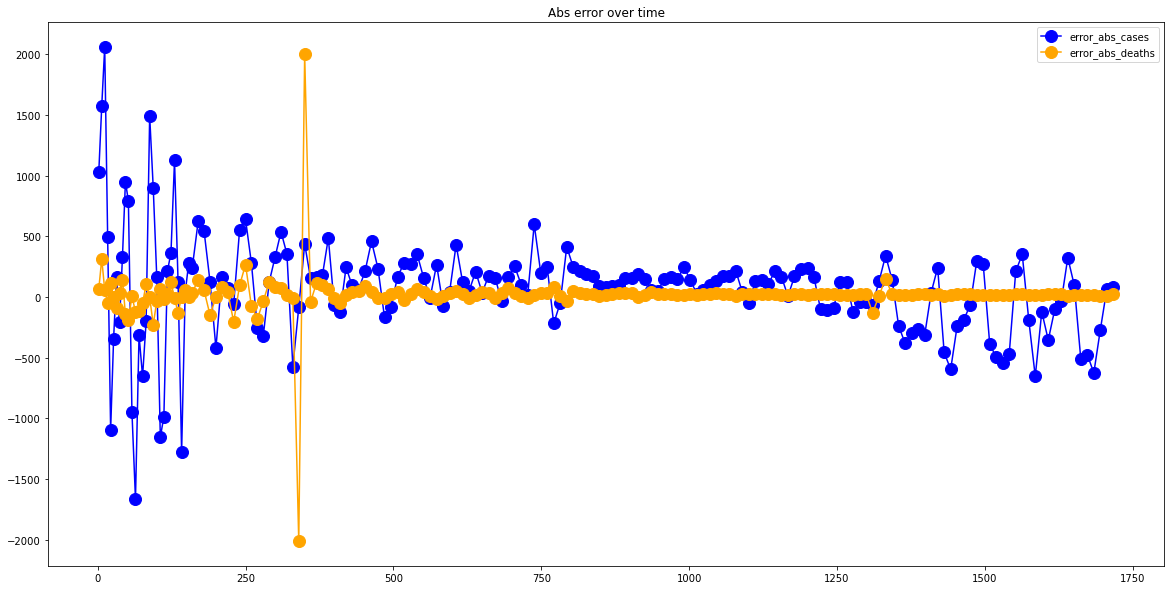

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2701.699421965318
RMSE =  5316.310123523624
-- Spain performances for deaths --
MAE =  120.38150289017341
RMSE =  310.60822302072506


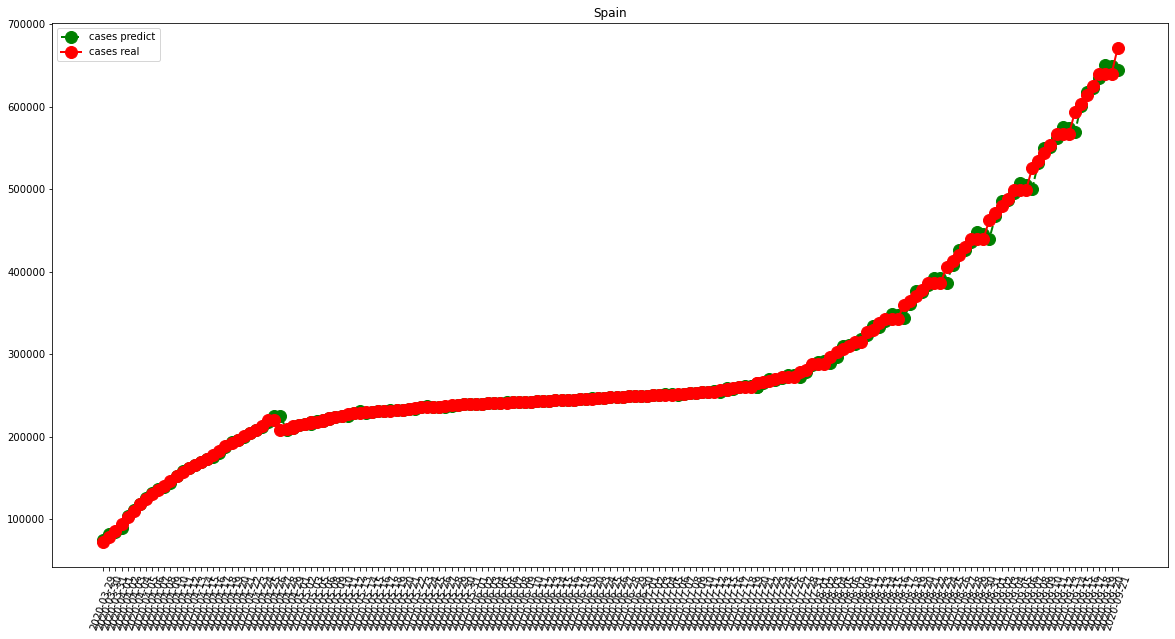

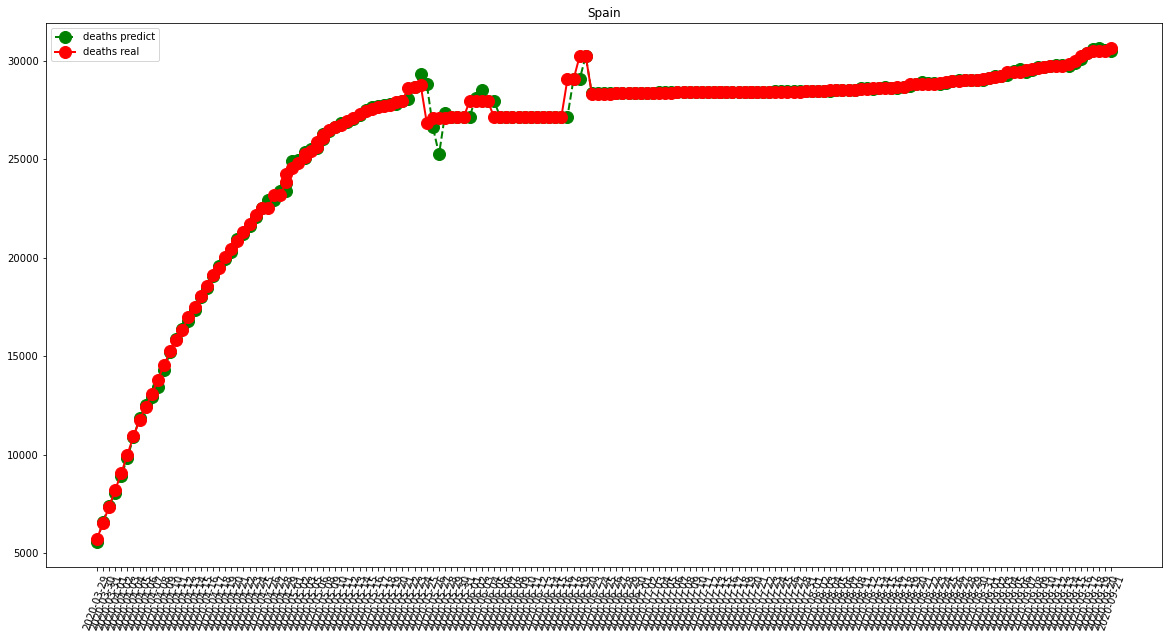

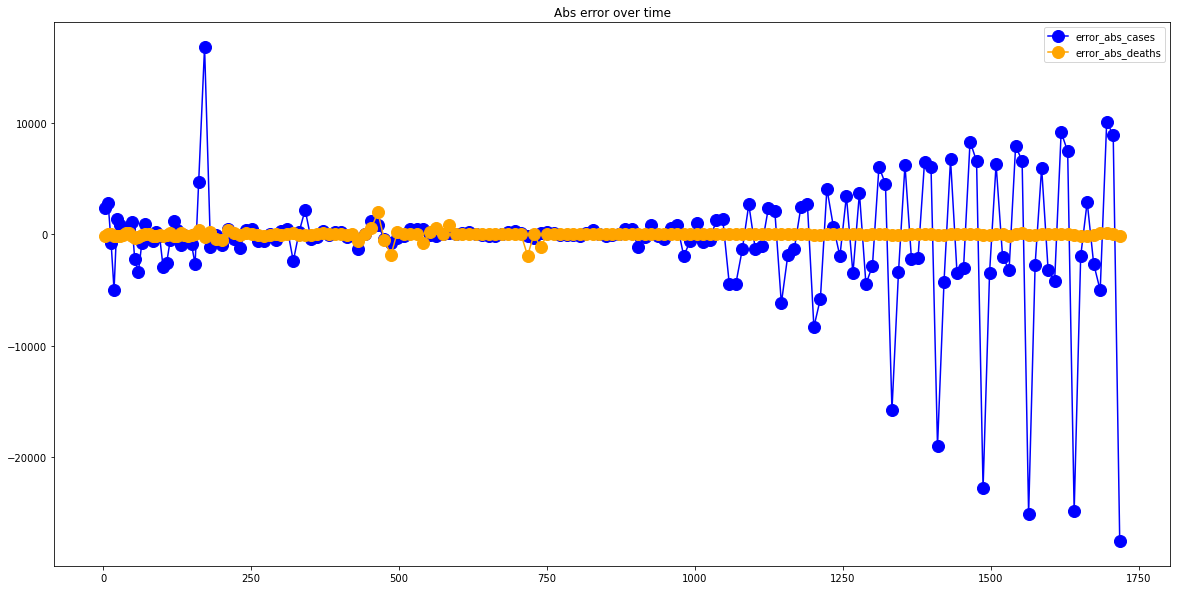

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15585.046242774566
RMSE =  23068.769205926452
-- United States performances for deaths --
MAE =  484.8208092485549
RMSE =  675.486953447257


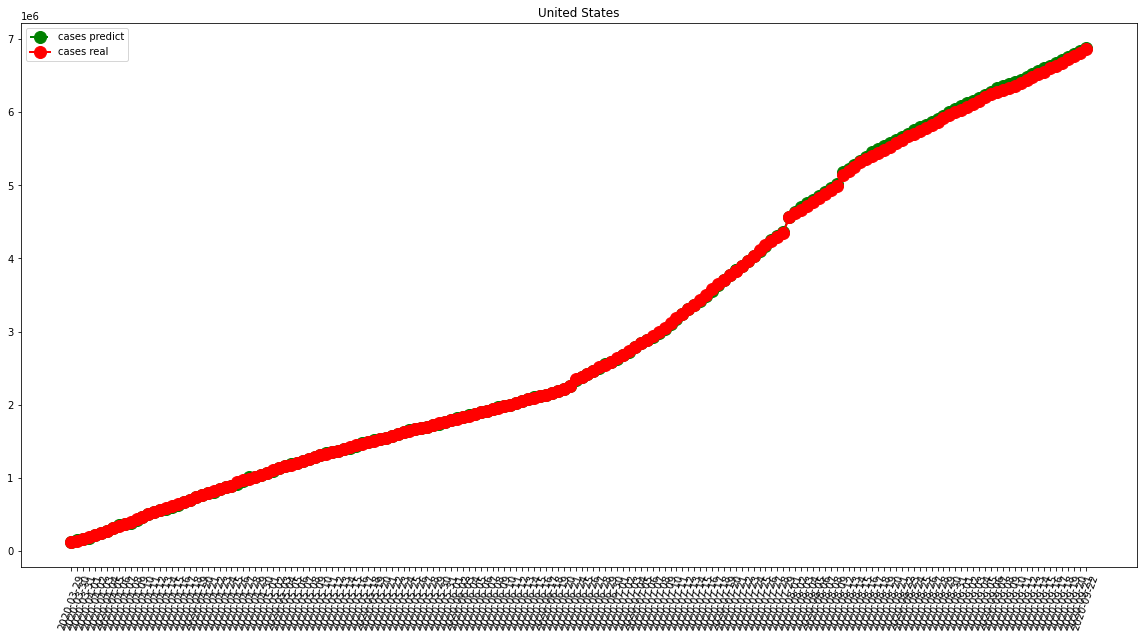

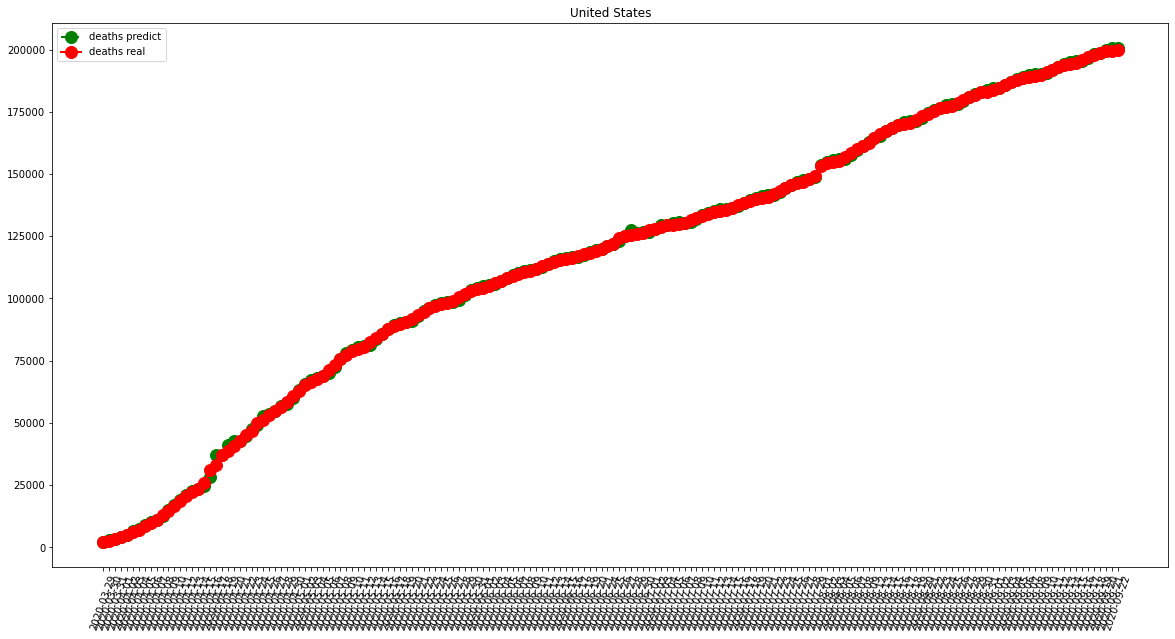

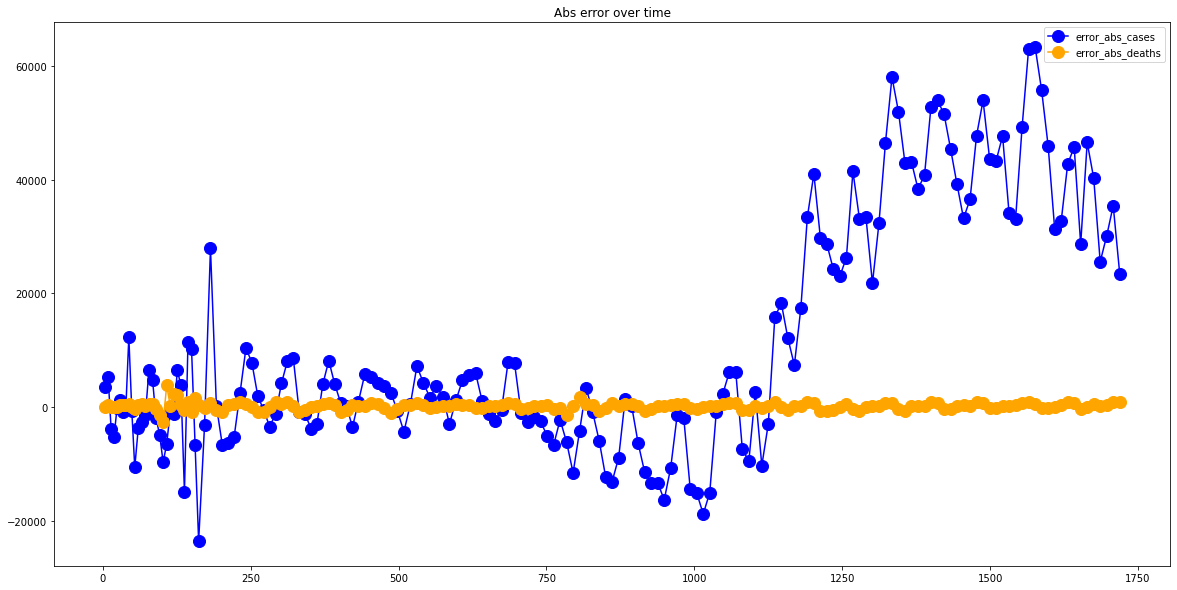

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  59.017341040462426
RMSE =  90.80487878721436
-- China performances for deaths --
MAE =  24.6878612716763
RMSE =  119.39570871733878


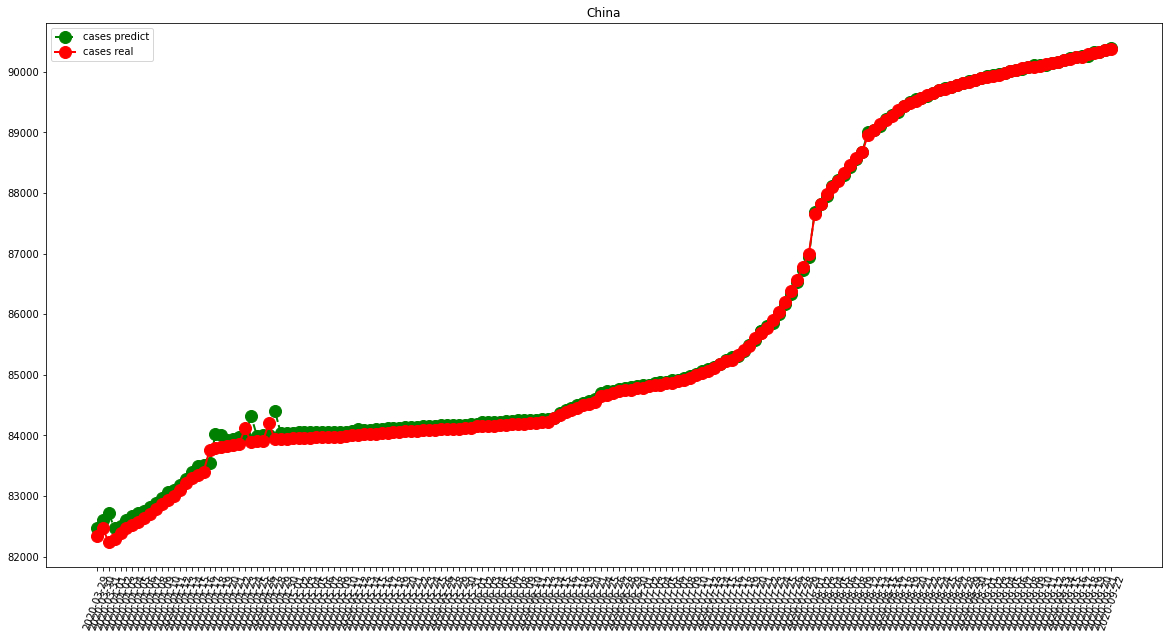

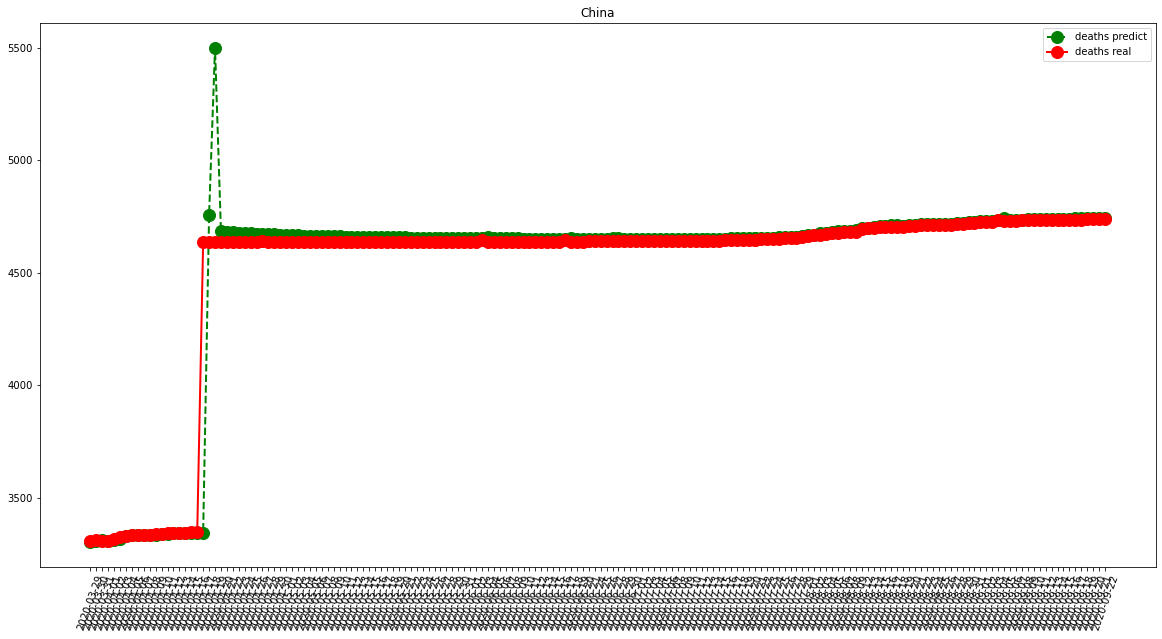

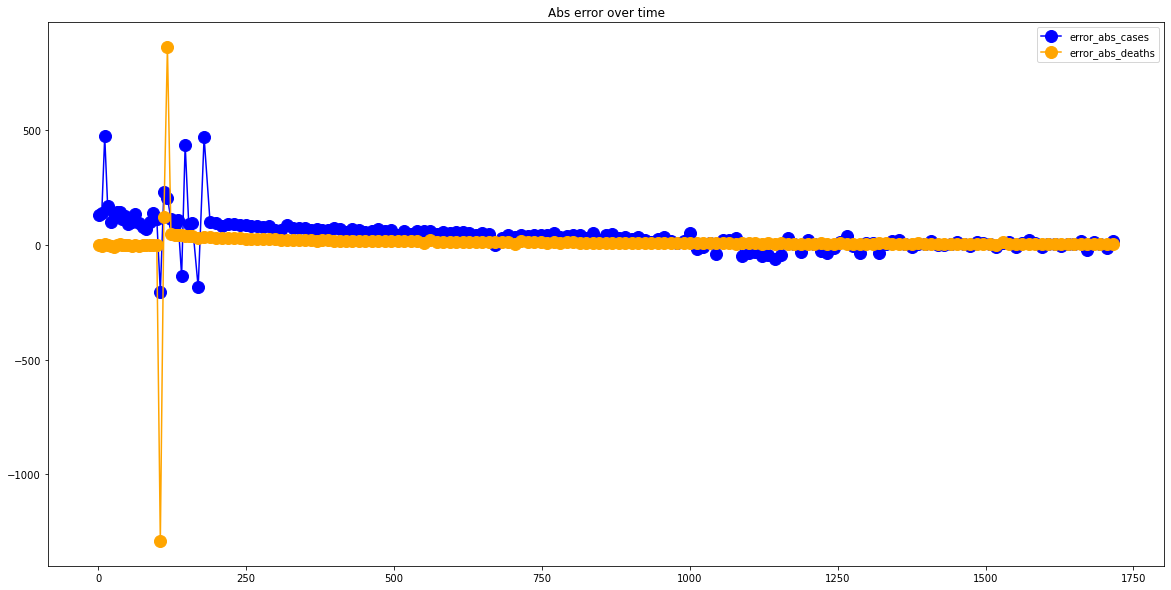

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1020.8758620689655
RMSE =  3491.8605681765425
-- United Kingdom performances for deaths --
MAE =  212.87586206896552
RMSE =  708.8215037214454


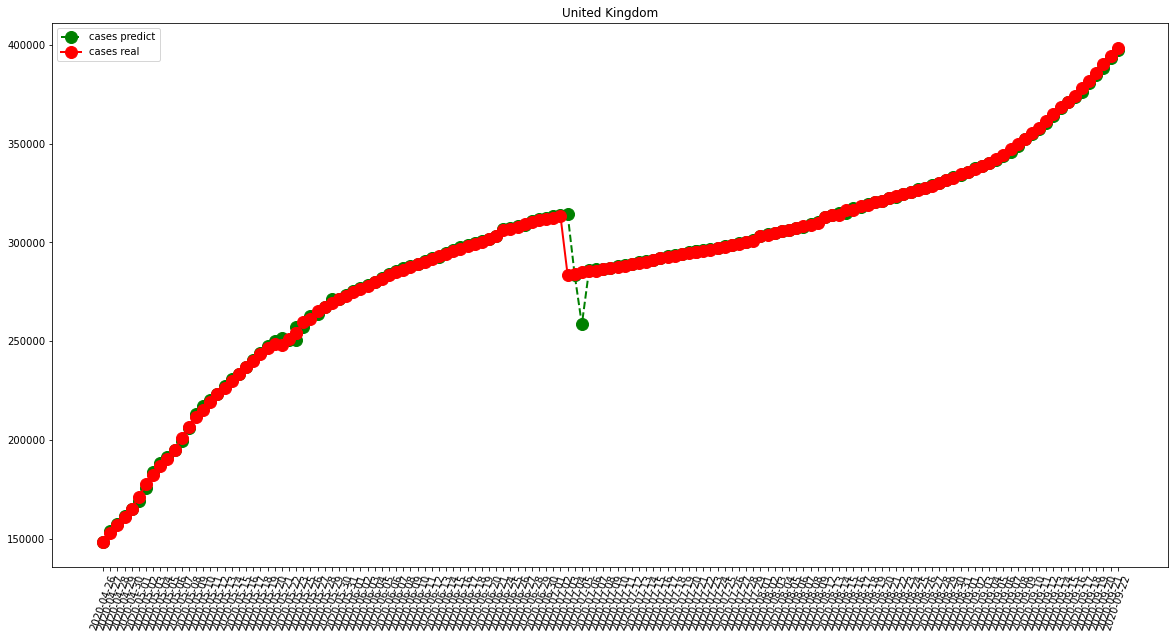

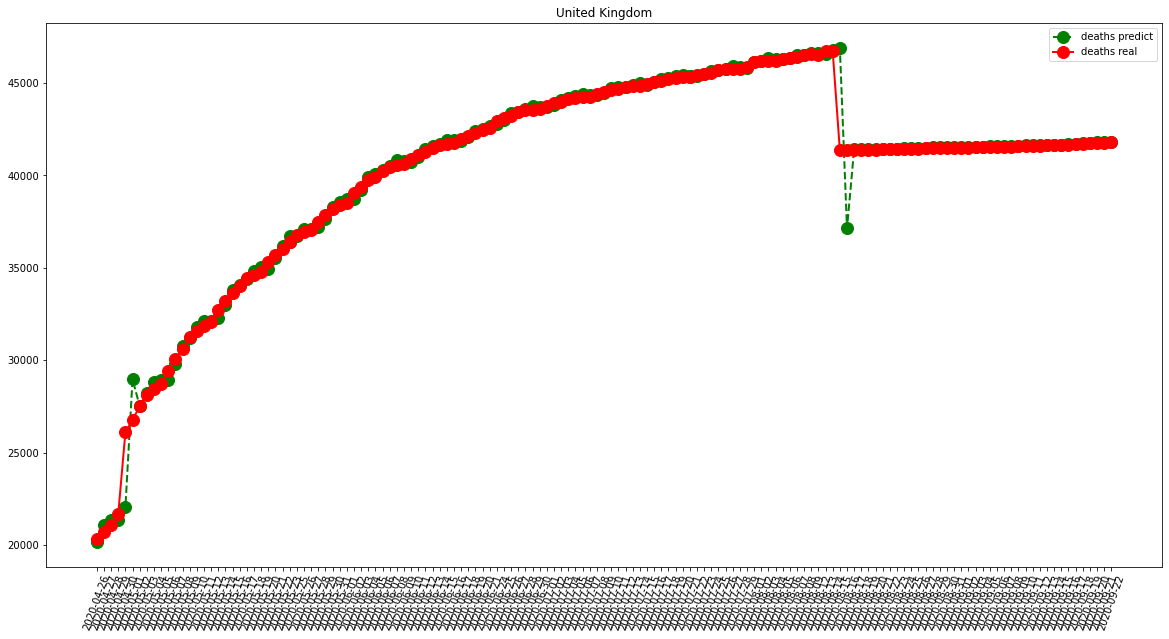

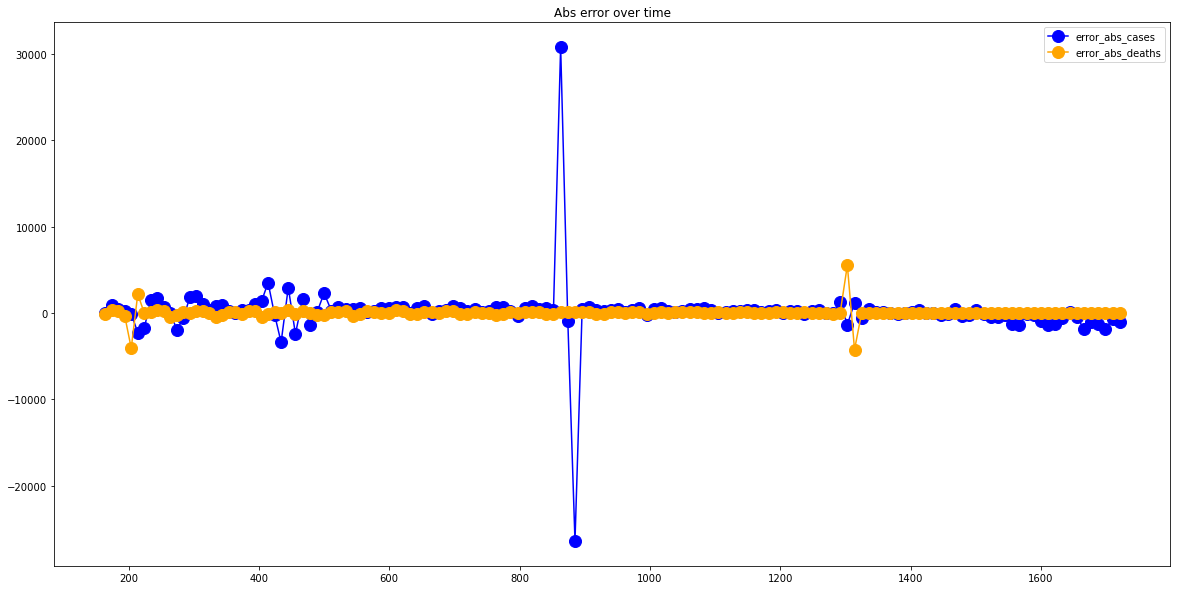

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  417.88275862068963
RMSE =  586.4103247432784
-- Germany performances for deaths --
MAE =  18.862068965517242
RMSE =  36.603466954694994


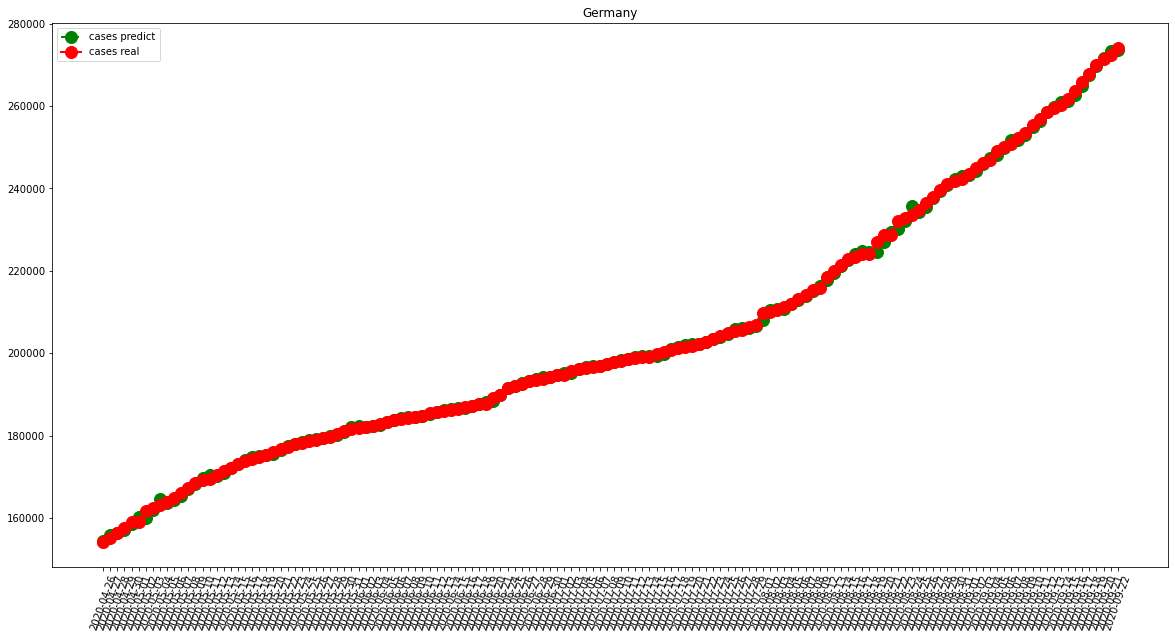

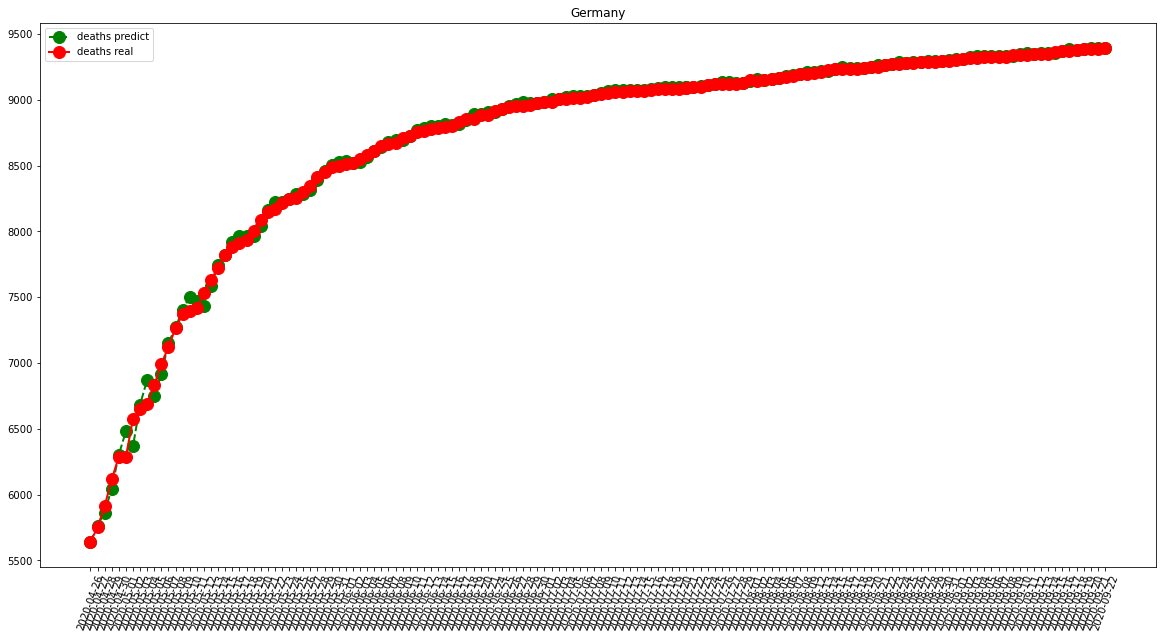

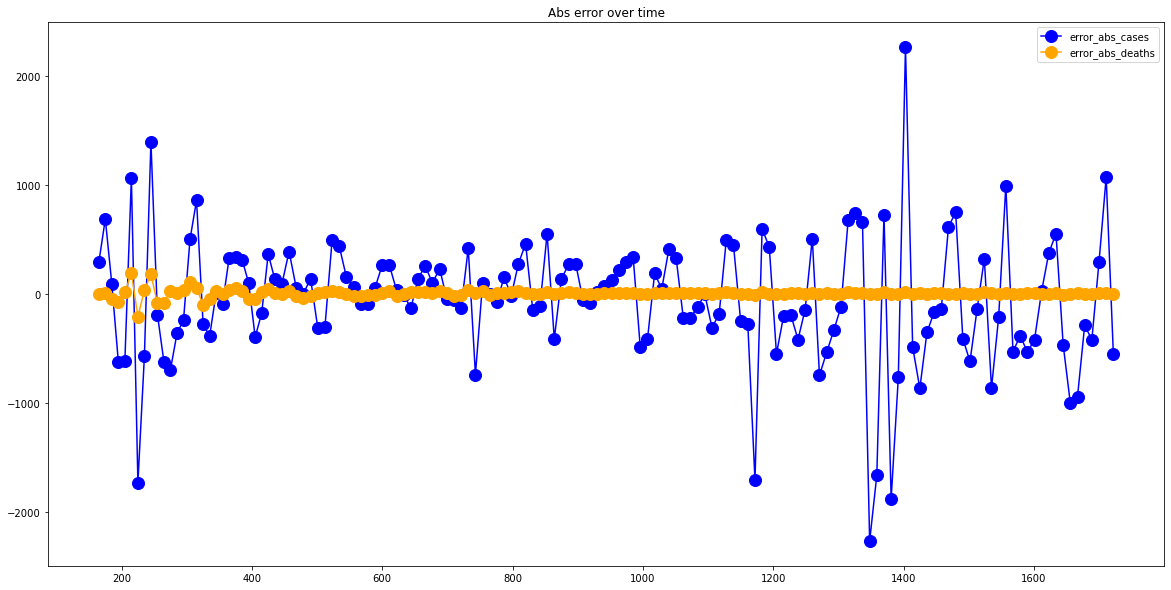

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  867.5310344827586
RMSE =  1224.9920478278132
-- Iran performances for deaths --
MAE =  51.751724137931035
RMSE =  85.13218930094781


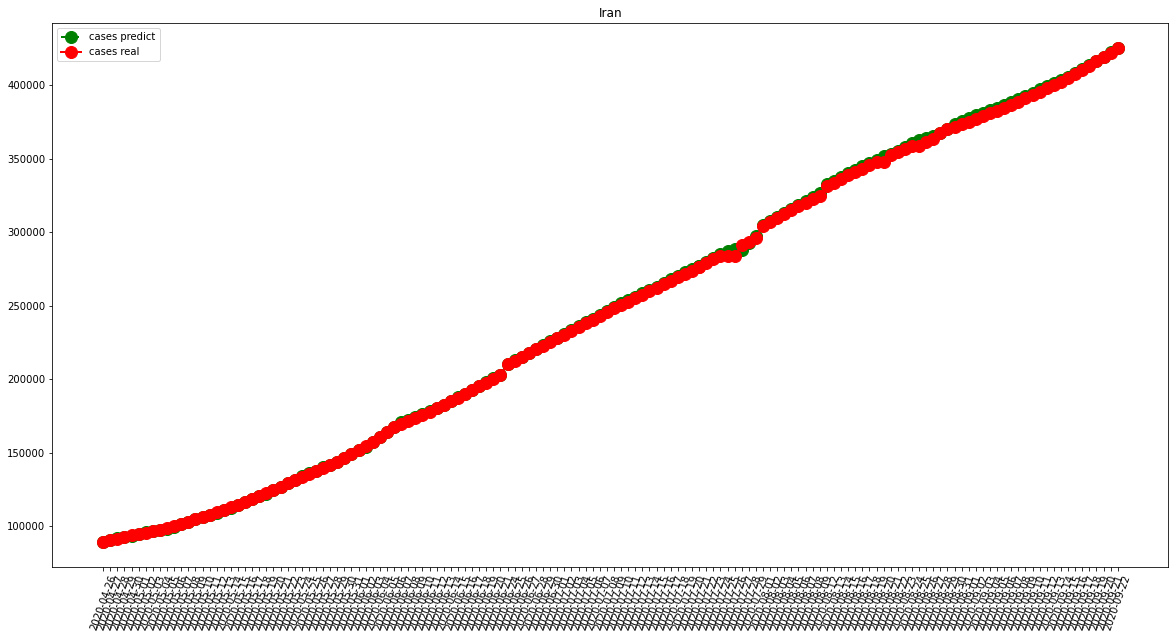

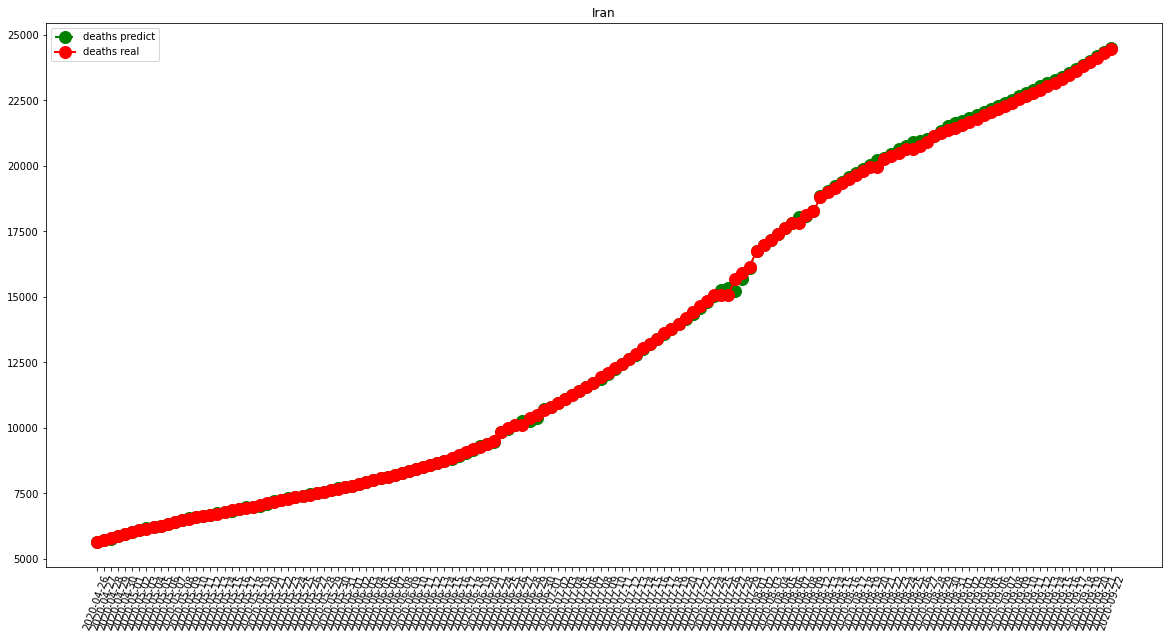

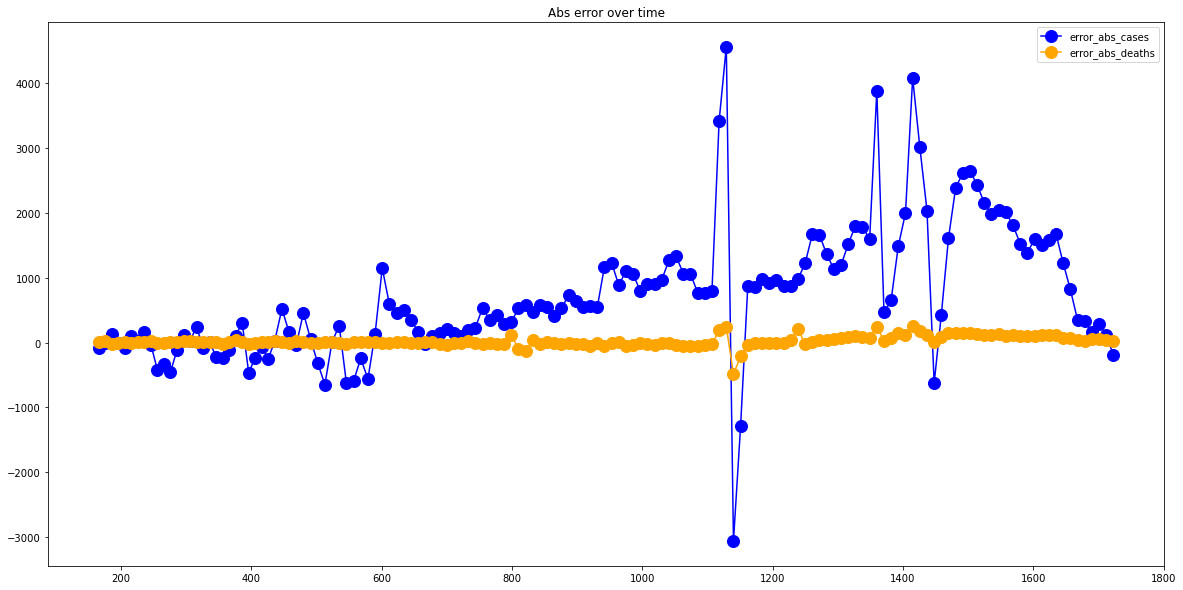

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  221.72413793103448
RMSE =  330.5186311197016
-- Turkey performances for deaths --
MAE =  15.86896551724138
RMSE =  84.52043213493327


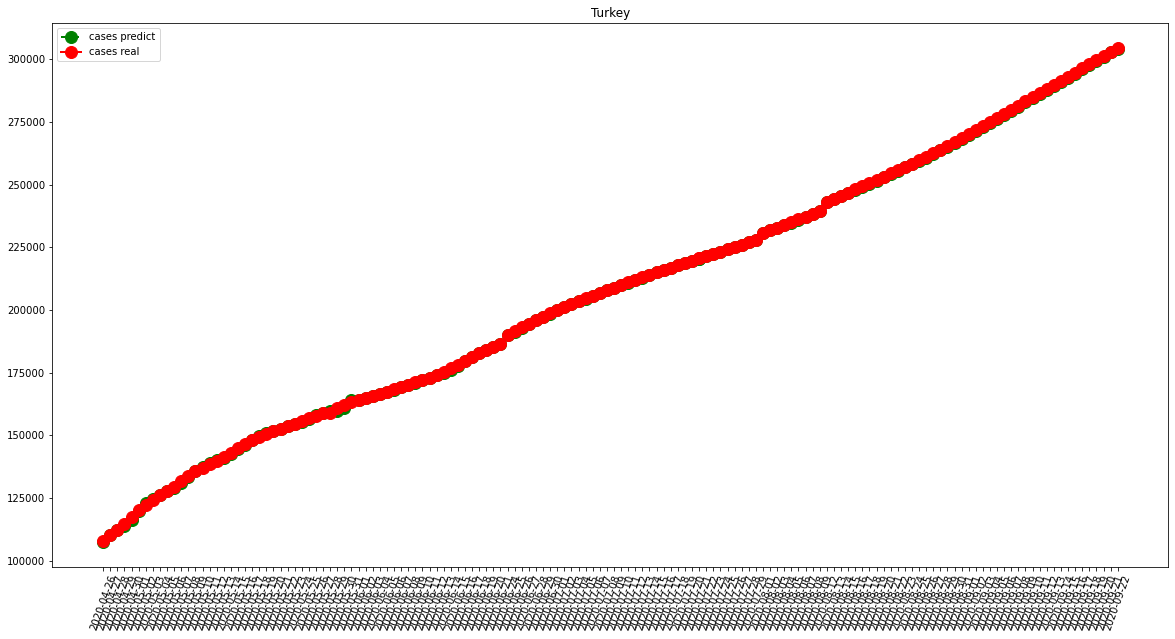

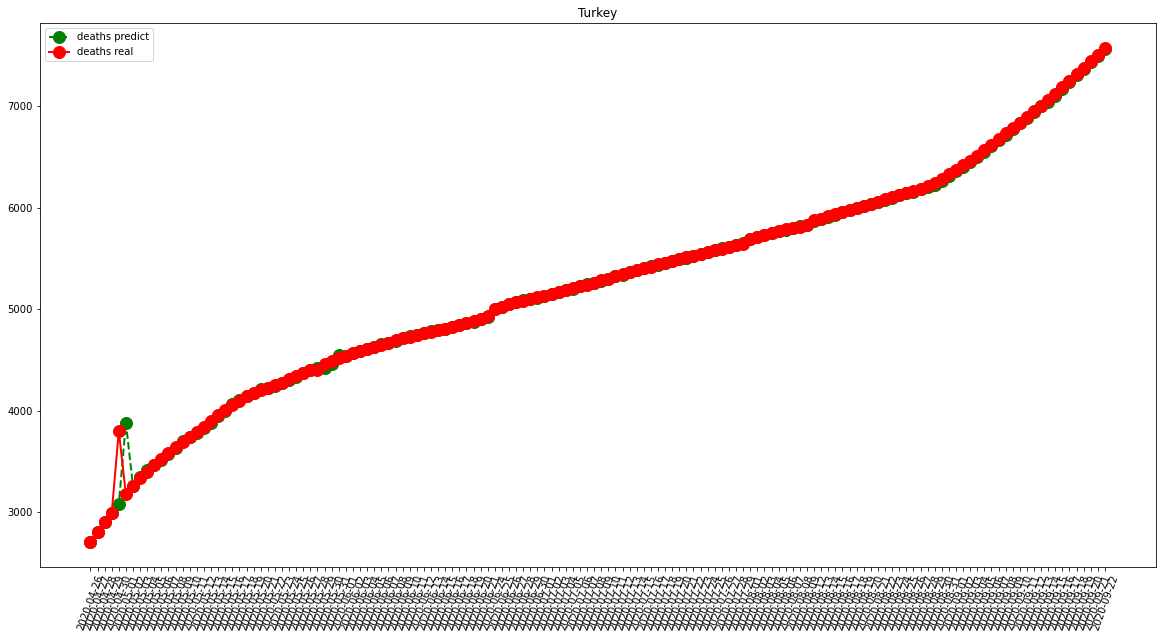

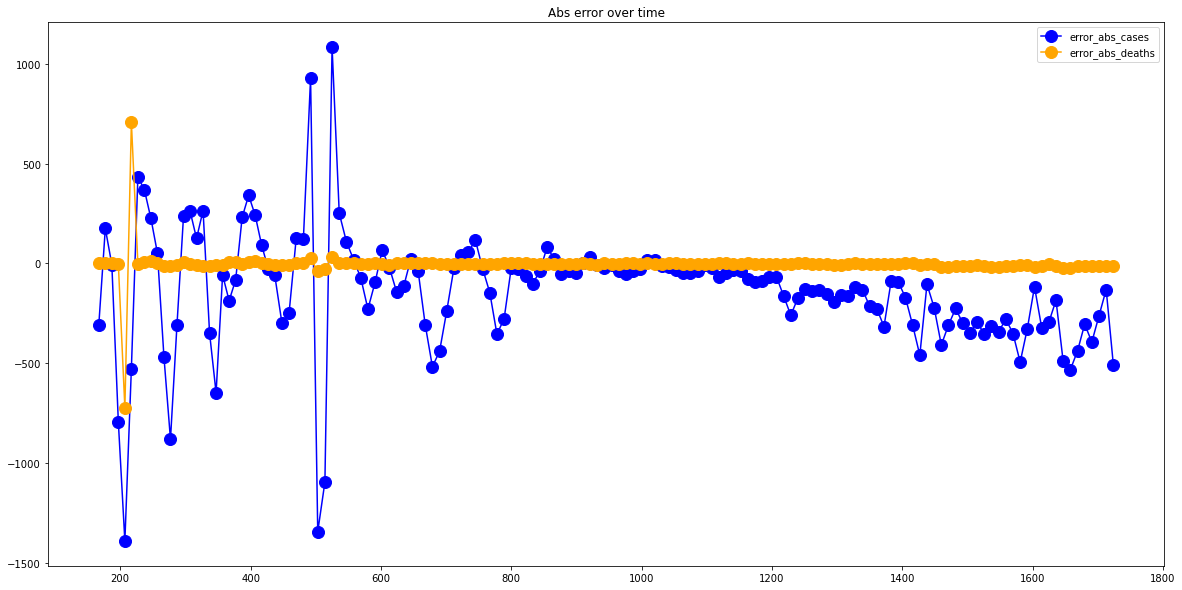

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16596.01694915254
RMSE =  21854.570906916102
-- Brazil performances for deaths --
MAE =  493.06779661016947
RMSE =  599.8554204337315


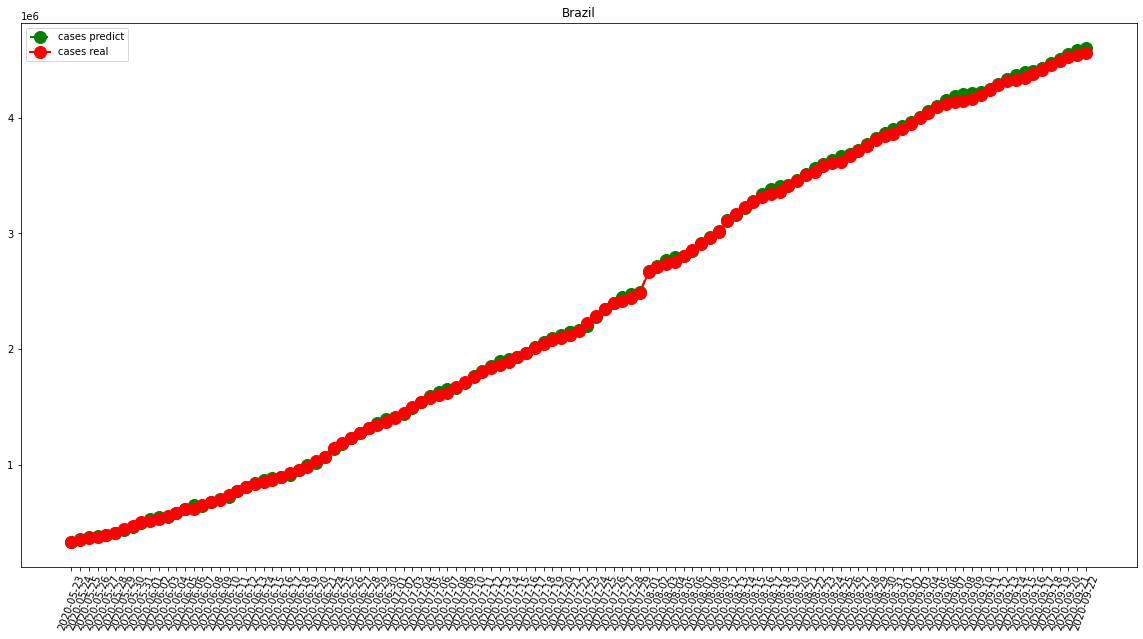

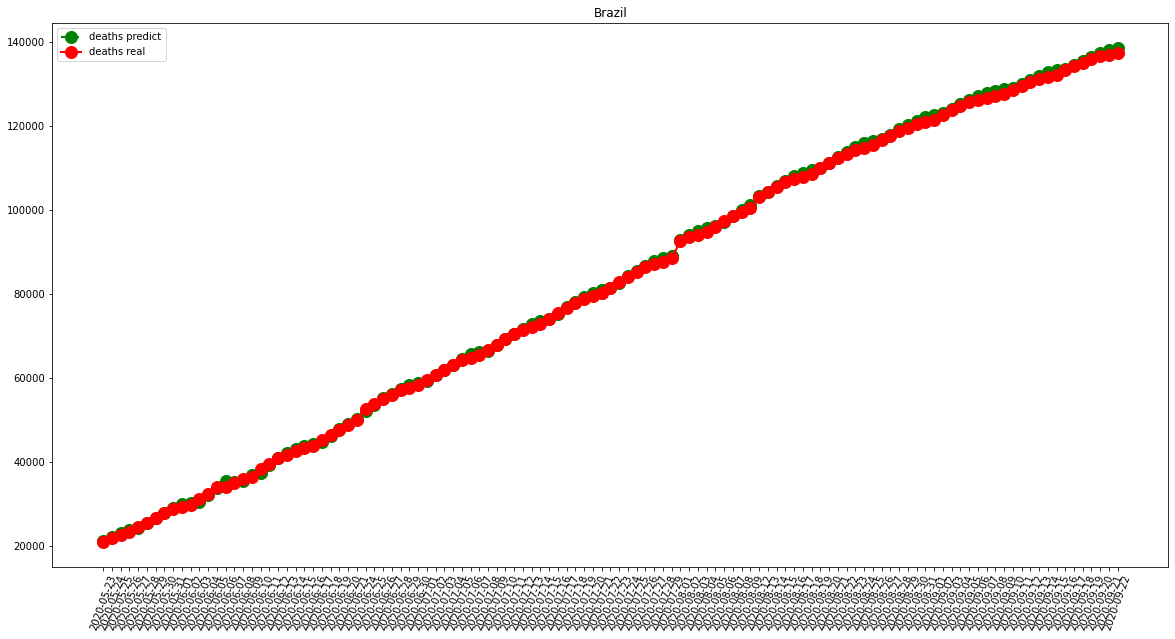

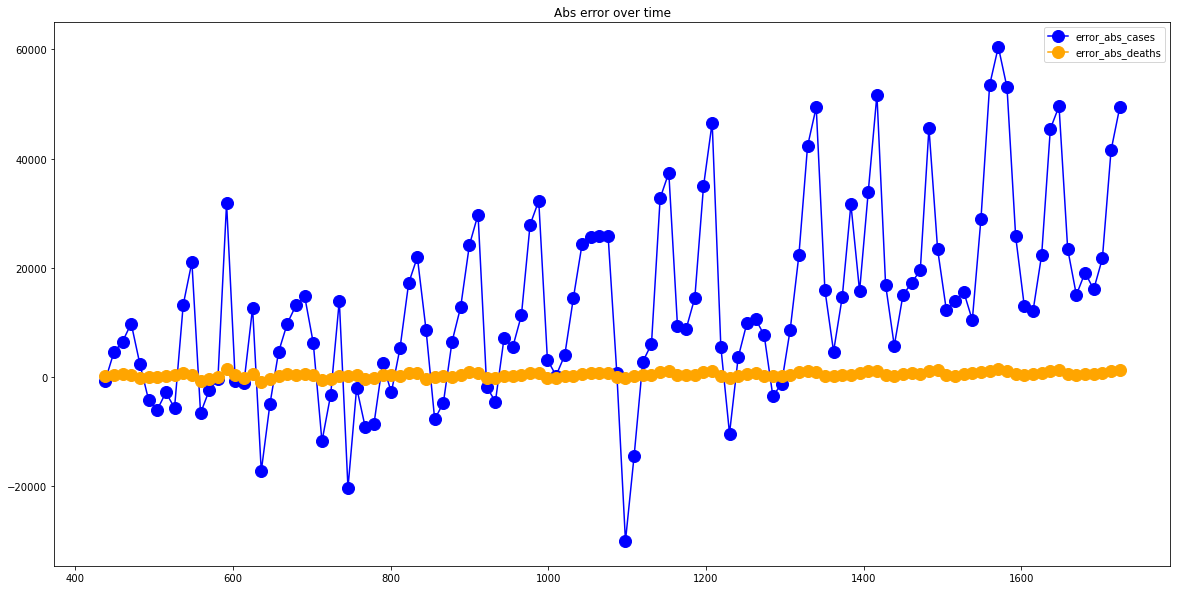

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)